In [2]:
#Imports

import numpy as np
import sympy as sp
from sympy import init_printing
from sympy import *
from sympy import Matrix, symbols, solve_linear_system
from sympy.interactive import printing
from sympy.printing.latex import LatexPrinter, print_latex
from sympy import Eq
printing.init_printing(use_latex=True)
import matplotlib.pyplot as plt

In [10]:
#Data 1222

E=180 #GPa
ν=0.4 #[-] 
a=float(input("a=")) #mm (25)
b=float(input("b=")) #mm (75)
c=float(input("c=")) #mm (120)
p=float(input("p=")) #MPa (350)
t=float(input("t=")) #mm (6)

#Change to SI

E=E*10**9
a=a/1000
b=b/1000
c=c/1000
t=t/1000
p=p*10**6

In [11]:
#Eredő elmozdulások meghatározása

print("Eredő elmozdulások meghatározása:")

#Symbols

ξ,η=sp.symbols("ξ,η")

#Forma függvények

N_1=1/4*(1-ξ)*(1-η)
N_2=1/4*(1+ξ)*(1-η)
N_3=1/4*(1+ξ)*(1+η)
N_4=1/4*(1-ξ)*(1+η)

N=[N_1,N_2,N_3,N_4]

#Trafó

def Jacobian(x_vec,y_vec):
    J_11=0
    J_12=0
    J_21=0
    J_22=0
    for i in range(len(N)):
        J_11+=sp.diff(N[i],ξ)*x_vec[i]
        J_12+=sp.diff(N[i],ξ)*y_vec[i]
        J_21+=sp.diff(N[i],η)*x_vec[i]
        J_22+=sp.diff(N[i],η)*y_vec[i]
    J=sp.Matrix([[J_11,J_12],[J_21,J_22]])
    return J

print("\nAz elemek Jacobi Mátrixai:")

#1.elem

x_1=[0,c/3,c/3,0]
y_1=[0,0,b-a,b]

#x_K=[0,100,100,0]
#y_K=[0,0,100,200]

J_1=Jacobian(x_1,y_1)

print("\nJ_1=")
display(J_1)

#2.elem

x_2=[c/3,c-a,c,0]
y_2=[b-a,b-a,b,b]

J_2=Jacobian(x_2,y_2)

print("\nJ_2=")
display(J_2)

#3.elem

x_3=[c-a,c,c,c-a]
y_3=[0,0,b,b-a]

J_3=Jacobian(x_3,y_3)

print("\nJ_3=")
display(J_3)

Eredő elmozdulások meghatározása:

Az elemek Jacobi Mátrixai:

J_1=


⎡0.0233333333333333  -0.00625⋅η - 0.00625⎤
⎢                                        ⎥
⎣        0           0.03375 - 0.00625⋅ξ ⎦


J_2=


⎡0.0179166666666667⋅η + 0.0520833333333333     0   ⎤
⎢                                                  ⎥
⎣0.0179166666666667⋅ξ - 0.00541666666666667  0.0125⎦


J_3=


⎡       0.0125         0.00625⋅η + 0.00625⎤
⎢                                         ⎥
⎣6.93889390390723e-18  0.00625⋅ξ + 0.03375⎦


Formafüggvények deriváltjai:

B mátrixok értékei:

D=


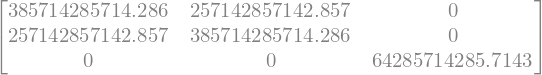

In [12]:
#Formafüggvények deriváltjai

print("\nFormafüggvények deriváltjai:")

def N_dx_dy(N_i,J_i):
    N_i_dξ_dη=sp.Matrix([[sp.diff(N_i,ξ)], [sp.diff(N_i,η)]])
    N_i_dx_dy=J_i.inv()*N_i_dξ_dη
    return  N_i_dx_dy


J_tensor=[J_1,J_2,J_3]

N_i_j_dx=sp.Matrix(np.zeros(12))
N_i_j_dy=sp.Matrix(np.zeros(12))

for j in range(len(J_tensor)):
    for i in range(len(N)):
        N_i_dx_dy=N_dx_dy(N[i],J_tensor[j])
        N_i_j_dx[i+4*j]=N_i_dx_dy[0]
        N_i_j_dy[i+4*j]=N_i_dx_dy[1]

#display(N_i_j_dx)
#display(N_i_j_dy) #sztem ezek jok

def sub_N_i(N_i_di,n):
    N_di=sp.Matrix(np.zeros(4))
    for i in range(len(N_di)):
        N_di[i]=N_i_di[i+(n-1)*4]
    
    return N_di
    
#Subvectors

N_dx_1=sub_N_i(N_i_j_dx,1)
N_dy_1=sub_N_i(N_i_j_dy,1)

N_dx_2=sub_N_i(N_i_j_dx,2)
N_dy_2=sub_N_i(N_i_j_dy,2)

N_dx_3=sub_N_i(N_i_j_dx,3)
N_dy_3=sub_N_i(N_i_j_dy,3)

#B mátrixok

print("\nB mátrixok értékei:")

def B_i(N_dx,N_dy):
    B=sp.Matrix([[N_dx[0],0,N_dx[1],0,N_dx[2],0,N_dx[3],0],
                [0,N_dy[0],0,N_dy[1],0,N_dy[2],0,N_dy[3]],
                [N_dy[0],N_dx[0],N_dy[1],N_dx[1],N_dy[2],N_dx[2],N_dy[3],N_dx[3]]])
    return B

#Elemenként numerikusan

B_1=B_i(N_dx_1,N_dy_1)
B_2=B_i(N_dx_2,N_dy_2)
B_3=B_i(N_dx_3,N_dy_3)

#D mátrix

D=E/((1+ν)*(1-2*ν))*sp.Matrix([[1-ν,ν,0],[ν,1-ν,0],[0,0,(1-2*ν)/2]])
print("\nD=")
display(D)

Merevségi mátrixok meghatározása:

K_1=


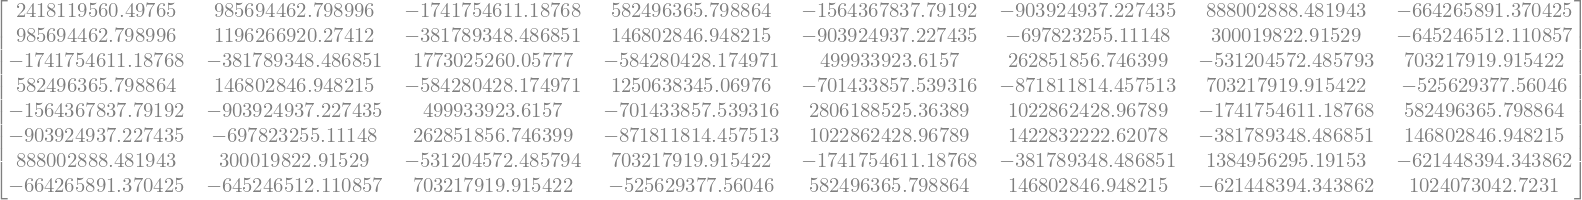

K_2=


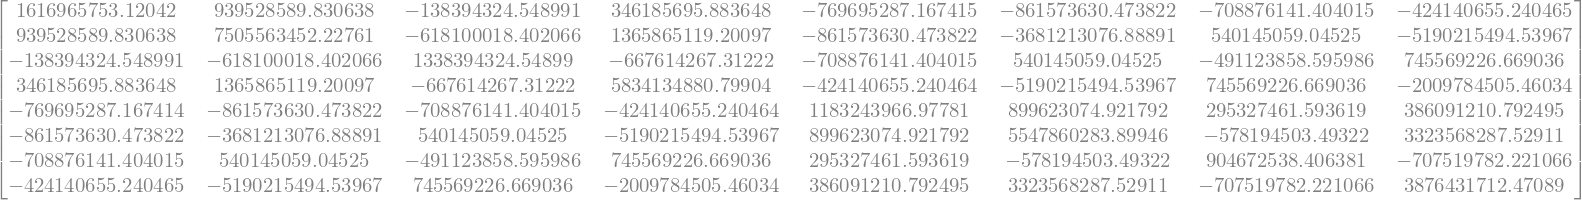

K_3=


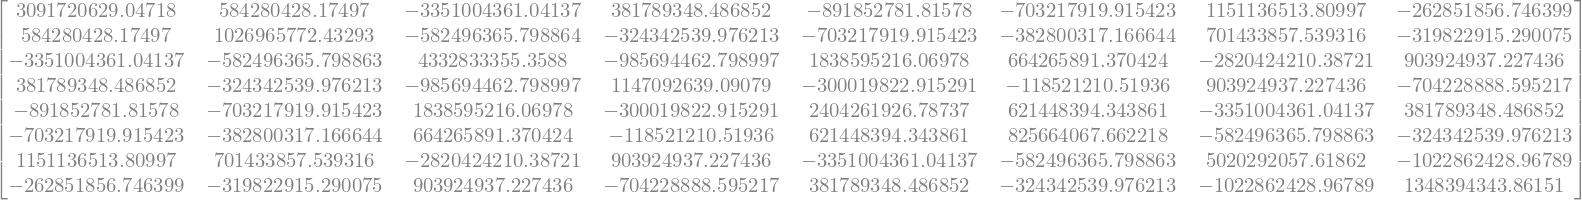

In [14]:
#Merevségi mátrixok meghatározása

print("Merevségi mátrixok meghatározása:")

#K mátrixok

def K_i(B_i,J_i):
    F_i=Transpose(B_i)*D*B_i*J_i.det()*t
    K_i=F_i.subs({ξ:-1/np.sqrt(3), η:-1/np.sqrt(3)})+F_i.subs({ξ:1/np.sqrt(3), η:-1/np.sqrt(3)})+F_i.subs({ξ:1/np.sqrt(3), η:1/np.sqrt(3)})+F_i.subs({ξ:-1/np.sqrt(3), η:1/np.sqrt(3)})
    return K_i

#Elemenként

K_1=K_i(B_1,J_1)
print("\nK_1=")
display(K_1)

K_2=K_i(B_2,J_2)
print("K_2=")
display(K_2)

K_3=K_i(B_3,J_3)
print("K_3=")
display(K_3)


Globális merevségi mátrix meghatározása:

K_glob=


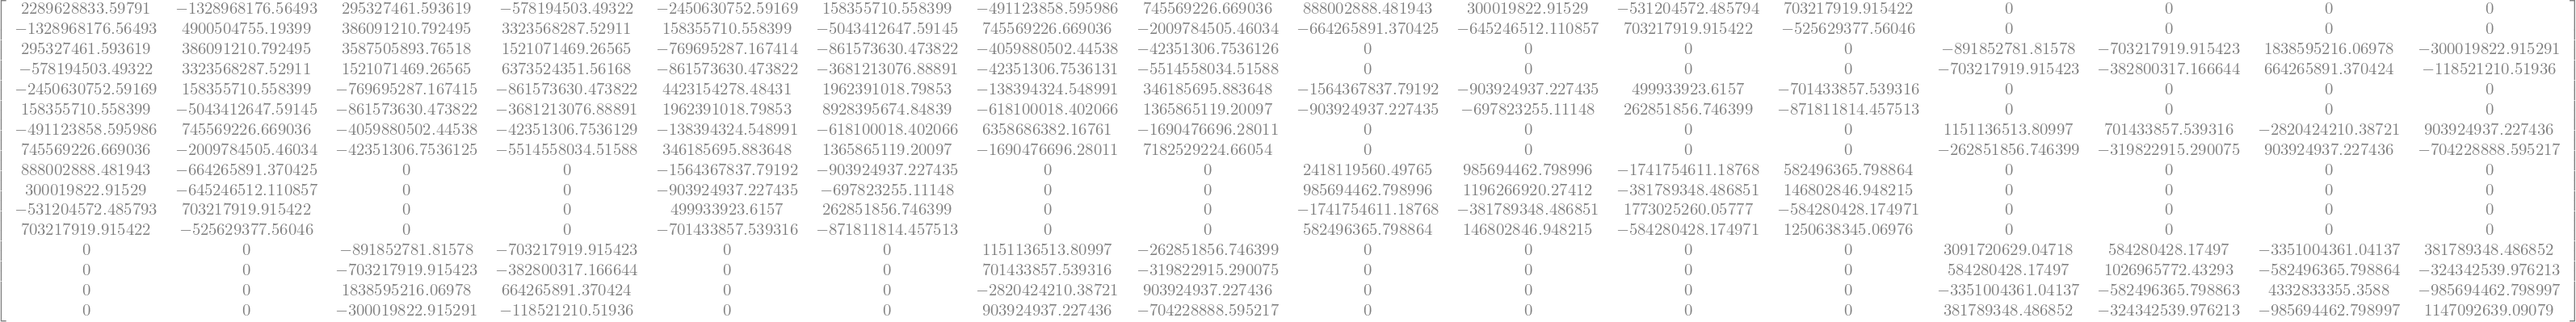

In [15]:
#Globális merevségi mátrix

print("\nGlobális merevségi mátrix meghatározása:")

ecs = sp.Matrix([[5,6,3,1],[3,4,2,1],[7,8,2,4]])

eDOF1 = [2*ecs[0,0]-1, 2*ecs[0,0], 2*ecs[0,1]-1, 2*ecs[0,1], 2*ecs[0,2]-1, 2*ecs[0,2], 2*ecs[0,3]-1, 2*ecs[0,3]]
eDOF2 = [2*ecs[1,0]-1, 2*ecs[1,0], 2*ecs[1,1]-1, 2*ecs[1,1], 2*ecs[1,2]-1, 2*ecs[1,2], 2*ecs[1,3]-1, 2*ecs[1,3]]
eDOF3 = [2*ecs[2,0]-1, 2*ecs[2,0], 2*ecs[2,1]-1, 2*ecs[2,1], 2*ecs[2,2]-1, 2*ecs[2,2], 2*ecs[2,3]-1, 2*ecs[2,3]]


def ExtMatrix(mx, rows, size):
    n = len(rows)
    Mx = np.zeros((size,size))
    for i in range(n):
        for j in range(n):
            Mx[rows[i]-1,rows[j]-1] = mx[i,j]
    return Mx

K_glob = sp.Matrix(ExtMatrix(K_1, eDOF1, 16) + ExtMatrix(K_2, eDOF2, 16) + ExtMatrix(K_3, eDOF3, 16))

print("\nK_glob=")

display(K_glob)

Globális terhelésvektor:

F_glob=


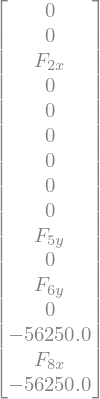

Globális elmozdulásvektor:

U_glob=


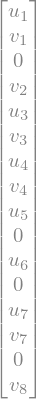

In [18]:
#Globális terhelésvektor

print("Globális terhelésvektor:")

#Symbols

F2_x,F8_x,F5_y,F6_y=sp.symbols("F2_x,F8_x,F5_y,F6_y")

F_glob=sp.Matrix(([0],[0],[F2_x],[0],[0],[0],[0],[0],[0],[F5_y],[0],[F6_y],[0],[-p/2*a*t],[F8_x],[-p/2*a*t]))

print("\nF_glob=")
display(F_glob)

#Globális elmozdulásvektor

print("Globális elmozdulásvektor:")

u_1,v_1,u_2,v_2,u_3,v_3,u_4,v_4,u_5,v_5,u_6,v_6,u_7,v_7,u_8,v_8=sp.symbols("u_1,v_1,u_2,v_2,u_3,v_3,u_4,v_4,u_5,v_5,u_6,v_6,u_7,v_7,u_8,v_8")

#PF

v_5=0
v_6=0
u_2=0
u_8=0

U_glob=sp.Matrix([[u_1],[v_1],[u_2],[v_2],[u_3],[v_3],[u_4],[v_4],[u_5],[v_5],[u_6],[v_6],[u_7],[v_7],[u_8],[v_8]])

print("\nU_glob=")
display(U_glob)

A kondenzált merevségi mátrix:

K_kond=


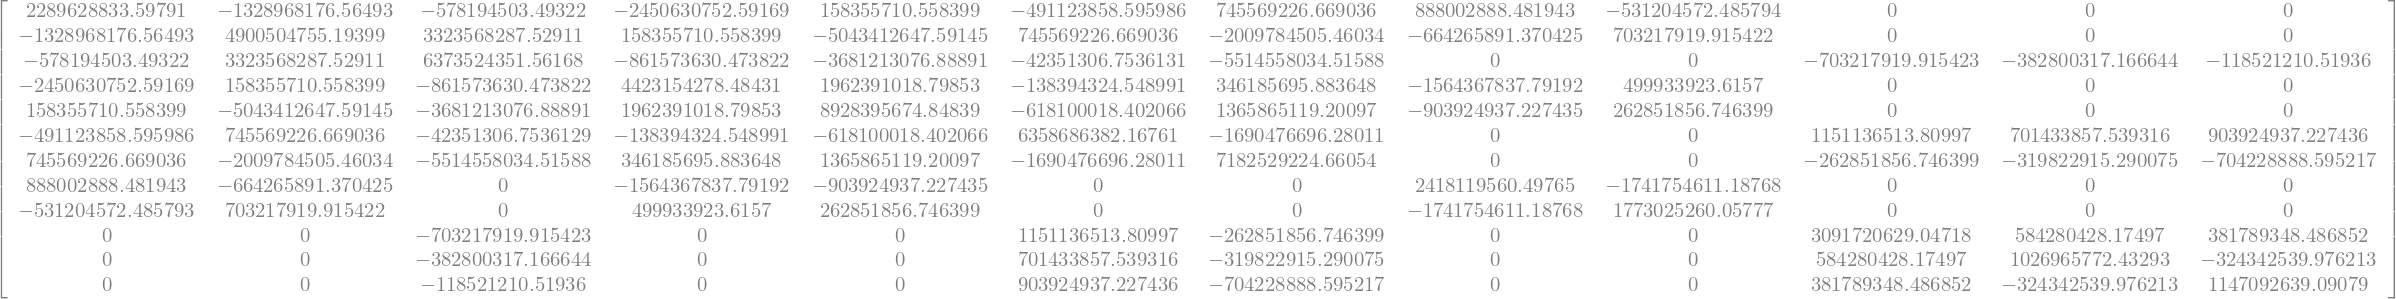


A kondenzált terhelés vektor:

F_kond=


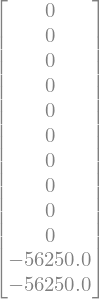


A kondenzált elmozdulás vektor:

U_kond=


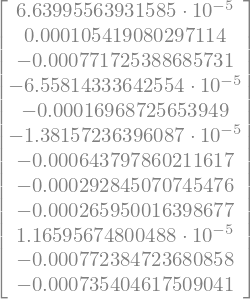

In [24]:
#Kondenzált mennyiségek

#Kondenzalt merevsegi matrix

print("A kondenzált merevségi mátrix:")

def SubMatrix(Mx, rows):
    n = len(rows)
    mx = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            mx[i,j] = Mx[rows[i]-1,rows[j]-1]
    return sp.Matrix(mx)

freeDoF=sp.Matrix([[1,2,4,5,6,7,8,9,11,13,14,16]])

K_kond=SubMatrix(K_glob,freeDoF)

print("\nK_kond=")

display(K_kond)

#Kondenzalt terheles vektor

print("\nA kondenzált terhelés vektor:")

def SubVector(Mx, rows):
    n = len(rows)
    mx = np.zeros((n, 1))
    for i in range(n):
        mx[i, 0] = Mx[rows[i]-1, 0]
    return sp.Matrix(mx)

F_kond=SubVector(F_glob,freeDoF)

print("\nF_kond=")

display(F_kond)

#Kondenzalas elmozdulas vektor

print("\nA kondenzált elmozdulás vektor:")

U_kond=sp.Matrix(np.matmul(sp.Inverse(K_kond),F_kond))

print("\nU_kond=")

display(U_kond)

In [30]:
#Elmozdulás komponensek

print("Az elmozdulás komponensek:")

u_1=U_kond[0]
v_1=U_kond[1]
v_2=U_kond[2]
u_3=U_kond[3]
v_3=U_kond[4]
u_4=U_kond[5]
v_4=U_kond[6]
u_5=U_kond[7]
u_6=U_kond[8]
u_7=U_kond[9]
v_7=U_kond[10]
v_8=U_kond[11]

print("\nu_1=",u_1*10**6,"[μm]")
print("v_1=",v_1*10**6,"[μm]")
print("v_2=",v_2*10**6,"[μm]")
print("u_3=",u_3*10**6,"[μm]")
print("v_3=",v_3*10**6,"[μm]")
print("u_4=",u_4*10**6,"[μm]")
print("v_4=",v_4*10**6,"[μm]")
print("u_5=",u_5*10**6,"[μm]")
print("u_6=",u_6*10**6,"[μm]")
print("u_7=",u_7*10**6,"[μm]")
print("v_7=",v_7*10**6,"[μm]")
print("v_8=",v_8*10**6,"[μm]")

#Eredő elmozdulások:

print("\nEredő elmozdulások:")

Δ_1=(u_1**2+v_1**2)**(1/2)
print("\nΔ_1=",Δ_1*10**6,"[μm]")

Δ_2=(u_2**2+v_2**2)**(1/2)
print("Δ_2=",Δ_2*10**6,"[μm]")

Δ_3=(u_3**2+v_3**2)**(1/2)
print("Δ_3=",Δ_3*10**6,"[μm]")

Δ_4=(u_4**2+v_4**2)**(1/2)
print("Δ_4=",Δ_4*10**6,"[μm]")

Δ_5=(u_5**2+v_5**2)**(1/2)
print("Δ_5=",Δ_5*10**6,"[μm]")

Δ_6=(u_6**2+v_6**2)**(1/2)
print("Δ_6=",Δ_6*10**6,"[μm]")

Δ_7=(u_7**2+v_7**2)**(1/2)
print("Δ_7=",Δ_7*10**6,"[μm]")

Δ_8=(u_8**2+v_8**2)**(1/2)
print("Δ_8=",Δ_8*10**6,"[μm]")

Az elmozdulás komponensek:

u_1= 66.3995563931585 [μm]
v_1= 105.419080297114 [μm]
v_2= -771.725388685731 [μm]
u_3= -65.5814333642554 [μm]
v_3= -169.687256539490 [μm]
u_4= -13.8157236396087 [μm]
v_4= -643.797860211617 [μm]
u_5= -292.845070745476 [μm]
u_6= -265.950016398677 [μm]
u_7= 11.6595674800488 [μm]
v_7= -772.384723680858 [μm]
v_8= -735.404617509041 [μm]

Eredő elmozdulások:

Δ_1= 124.587654203366 [μm]
Δ_2= 771.725388685731 [μm]
Δ_3= 181.919458645877 [μm]
Δ_4= 643.946083948604 [μm]
Δ_5= 292.845070745476 [μm]
Δ_6= 265.950016398677 [μm]
Δ_7= 772.472722424149 [μm]
Δ_8= 735.404617509041 [μm]


In [35]:
#Globális elmozdulásvektor

print("A globális elmozdulásvektor:")

U_glob=sp.Matrix([[u_1],[v_1],[u_2],[v_2],[u_3],[v_3],[u_4],[v_4],[u_5],[v_5],[u_6],[v_6],[u_7],[v_7],[u_8],[v_8]])

print("\nU_glob=")
display(U_glob)

#Globalis terhelesvektor

print("\nGlobális terhelésvektor:")

F_glob=sp.Matrix(np.matmul(K_glob,U_glob))

print("\nF_glob=")
display(F_glob)

#Terheléskomponensek meghatározása

print("\nA terhelés komponensek:")

F2_x=F_glob[2]
F5_y=F_glob[9]
F6_y=F_glob[11]
F8_x=F_glob[14]

print("\nF2_x=",F2_x/1000,"[kN]")
print("F5_y=",F5_y/1000,"[kN]")
print("F6_y=",F6_y/1000,"[kN]")
print("F8_x=",F8_x/1000,"[kN]")

A globális elmozdulásvektor:

U_glob=
